# Step1: Import libraries and our dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_link = 'http://bit.ly/w-data'
data = pd.read_csv(data_link)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Step2: Data Visualization

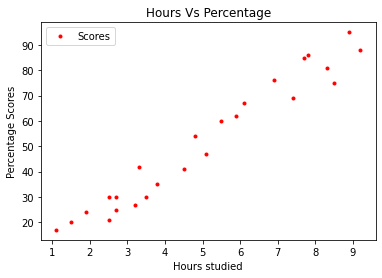

In [6]:
data.plot(x = 'Hours', y = 'Scores', style = '.', color = 'Red')
plt.title("Hours Vs Percentage")
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scores')
plt.show()

# Step3: Splitting Data

In [7]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 100)

# Step4: Training model

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

# Step5: Visualizing the model

In [10]:
m = model.coef_
c = model.intercept_
line = m*X + c

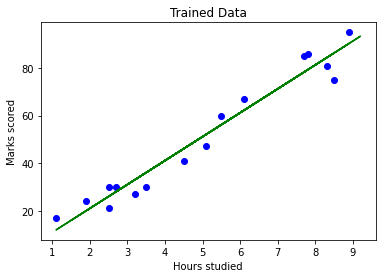

In [11]:
#plot for trained data

plt.scatter(X_train, Y_train, color = 'Blue')
plt.plot(X,line, color = 'Green')
plt.xlabel('Hours studied')
plt.ylabel('Marks scored')
plt.title('Trained Data')
plt.show()

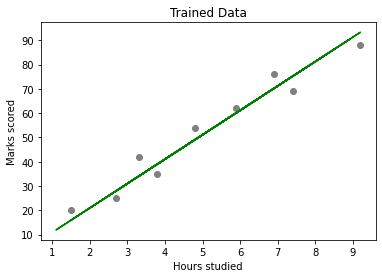

In [12]:
#plot for test data

plt.scatter(X_test, Y_test, color = 'Grey')
plt.plot(X,line, color = 'Green')
plt.xlabel('Hours studied')
plt.ylabel('Marks scored')
plt.title('Trained Data')
plt.show()

# Step6: Making Prediction

In [13]:
Y_predict = model.predict(X_test)

In [14]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted':Y_predict})
df

,Actual,Predicted
0,25,28.015937
1,35,39.068383
2,42,34.044544
3,62,60.168506
4,20,15.958724
5,69,75.240023
6,76,70.216184
7,54,49.116060
8,88,93.325843


In [15]:
#testing with our data
hours = 9.25
result = model.predict([[hours]])

print("If a student Studies for 9.25hrs/day, he can score {}".format(result[0]), "marks")

If a student Studies for 9.25hrs/day, he can score 93.82822672378322 marks


# Step7:  Evaluating our Model 

This is our final step. This step is important to compare how well different algorithms perform on a specific dataset. For simplicity here, we have chosen the Mean Square Error. There are many such metrics like,
1) Root-Mean-Squared-Error(RMSE).
2) Mean-Absolute-Error(MAE).
3) Coefficient of Determination.


In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_predict)) 

Mean Absolute Error: 4.794018624738147
